In [1]:
from envs.discrete_MDP import DiscreteMDP
from dp import policy_evaluation
from policy import DiscretePolicy
import numpy as np

In [2]:
# creating 4x4 gridworld
# actions: 0 - up, 1 - right, 2 - down, 3 - left

p0 = np.ones(16)
p0[0] = 0  # terminal state
p0[15] = 0 # terminal state
p0 = p0 / p0.sum()

p = np.zeros([16, 16, 4]) # 0 and 16 terminal states
for s in range(1, 15):
    if s - 4 < 0:
        p[s, s, 0] = 1
    else:
        p[s - 4, s, 0] = 1

    if s % 4 == 3:
        p[s, s, 1] = 1
    else:
        p[s + 1, s, 1] = 1

    if s + 4 > 15:
        p[s, s, 2] = 1
    else:
        p[s + 4, s, 2] = 1

    if s % 4 == 0:
        p[s, s, 3] = 1
    else:
        p[s - 1, s, 3] = 1

r = -np.ones([16, 16, 4]) # -1 for all transitions

env = DiscreteMDP(p0, p, r)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_policy(policy: DiscretePolicy):
    grid_array = policy.p.reshape(4, 4, 4)

    n = grid_array.shape[0]

    fig, ax = plt.subplots()

    for i in range(n):
        for j in range(n):
            if (i == 0 and j == 3) or (i == 3 and j == 0):
                ax.add_patch(patches.Rectangle((j, n - 1 - i), 1, 1, color='black'))
            else:
                for k in range(4):
                    if grid_array[n-i-1, j, k] != 0:
                        if k == 0:  # Arrow up
                            arrow = patches.Arrow(j + 0.5, n - 1 - i + 0.5, 0, -0.3, width=0.2)
                        elif k == 1:  # Arrow right
                            arrow = patches.Arrow(j + 0.5, n - 1 - i + 0.5, 0.3, 0, width=0.2)
                        elif k == 2:  # Arrow down
                            arrow = patches.Arrow(j + 0.5, n - 1 - i + 0.5, 0, 0.3, width=0.2)
                        elif k == 3:  # Arrow left
                            arrow = patches.Arrow(j + 0.5, n - 1 - i + 0.5, -0.3, 0, width=0.2)

                        ax.add_patch(arrow)

    ax.set_xlim(0, n)
    ax.set_ylim(0, n)
    ax.set_aspect('equal')
    ax.set_xticks(np.arange(n + 1))
    ax.set_yticks(np.arange(n + 1))
    ax.grid(True, which='both', color='black', linewidth=1.5, linestyle='-')
    ax.invert_yaxis()  # This inverts the y-axis to make (0, 0) the left-top corner
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    plt.show()


In [4]:
from td import td_prediction, sarsa, expected_sarsa, Q_learning

# create equiprobable policy
eq_policy = DiscretePolicy.from_env(env)
eq_policy.p = np.ones([env.states_num, env.actions_num]) / env.actions_num

In [5]:
td_prediction(env, eq_policy, 10000, 0.4, 1)

array([  0.        , -12.96297732, -22.21513399, -18.14481527,
       -17.55189855, -18.88155111, -16.79085365, -16.89488697,
       -19.04497387, -18.7151498 , -17.77425306,  -9.704905  ,
       -19.54452291, -18.63781386, -17.12375315,   0.        ])

In [6]:
sarsa_policy, sarsa_Q = sarsa(env, 1000, 0.5)
sarsa_policy.p

array([[0.925, 0.025, 0.025, 0.025],
       [0.025, 0.025, 0.025, 0.925],
       [0.025, 0.025, 0.025, 0.925],
       [0.025, 0.025, 0.925, 0.025],
       [0.925, 0.025, 0.025, 0.025],
       [0.925, 0.025, 0.025, 0.025],
       [0.025, 0.025, 0.025, 0.925],
       [0.025, 0.025, 0.925, 0.025],
       [0.925, 0.025, 0.025, 0.025],
       [0.025, 0.025, 0.925, 0.025],
       [0.025, 0.025, 0.925, 0.025],
       [0.025, 0.025, 0.925, 0.025],
       [0.925, 0.025, 0.025, 0.025],
       [0.025, 0.925, 0.025, 0.025],
       [0.025, 0.925, 0.025, 0.025],
       [0.925, 0.025, 0.025, 0.025]])

In [7]:
sarsa_Q

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [-1.98431396, -3.16237473, -3.04292555, -1.        ],
       [-3.38856844, -4.16883379, -4.29220305, -2.48856254],
       [-4.78654671, -4.49180441, -3.04981083, -4.95668796],
       [-1.        , -3.27637125, -3.1102053 , -2.1875    ],
       [-2.27642475, -4.2315808 , -3.78064869, -3.10895929],
       [-4.55823094, -4.47108593, -4.14358618, -4.07398385],
       [-4.23559749, -3.26735596, -2.00108054, -3.99989609],
       [-2.00001947, -3.8768743 , -3.83819754, -3.53435616],
       [-4.28975904, -4.12372291, -3.13235262, -3.30747575],
       [-4.22749356, -3.37384474, -2.07824161, -4.13198419],
       [-3.86706906, -1.99902344, -1.        , -3.14288283],
       [-3.36329886, -4.18719798, -3.73598906, -4.0227799 ],
       [-4.03782664, -2.59592173, -4.08731357, -4.35204695],
       [-3.8777632 , -1.        , -2.33251056, -3.76174887],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

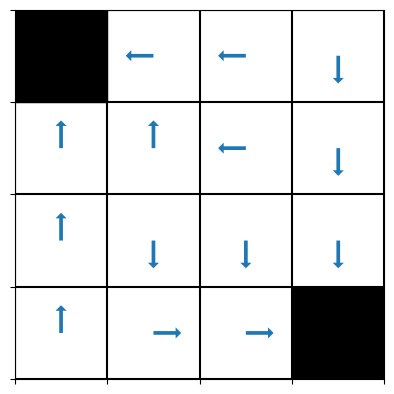

In [8]:
from mc import make_greedy_policy
plot_policy(make_greedy_policy(sarsa_Q))

In [9]:
Q_learning_policy, Q_learning_Q = Q_learning(env, 1000, 0.5)
Q_learning_Q

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [-1.99951172, -2.99609375, -2.9619015 , -1.        ],
       [-2.99594115, -3.47192383, -3.93026273, -2.        ],
       [-3.60112363, -3.86014538, -3.        , -3.        ],
       [-1.        , -2.99908941, -2.96875   , -1.99200439],
       [-2.        , -3.87708861, -3.88188594, -2.        ],
       [-2.99999977, -2.99999978, -2.99999974, -2.99999982],
       [-3.92393737, -2.74717712, -2.        , -3.01556973],
       [-2.        , -3.89676389, -3.9789846 , -2.98651123],
       [-2.99999994, -2.99999991, -2.9999999 , -2.9999999 ],
       [-3.7511904 , -2.        , -2.        , -3.72954248],
       [-2.9960937 , -1.99414062, -1.        , -2.99871813],
       [-3.        , -3.        , -3.82671725, -3.88420408],
       [-3.52337656, -2.        , -2.99177548, -3.69333734],
       [-2.97888171, -1.        , -1.98999023, -2.94921767],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

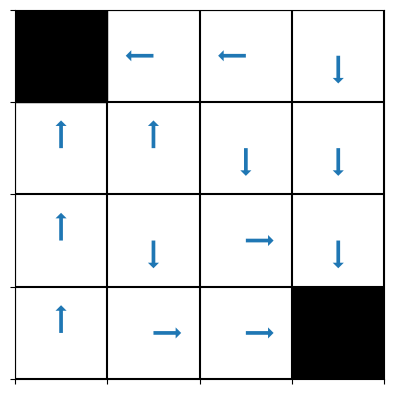

In [10]:
plot_policy(make_greedy_policy(Q_learning_Q))

In [11]:
expected_sarsa_policy, expected_sarsa_Q = expected_sarsa(env, 1000, 0.5)
expected_sarsa_Q

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [-2.13077269, -3.23786652, -3.19939244, -1.        ],
       [-3.16560393, -3.30047533, -4.07529529, -2.13917164],
       [-4.09427265, -3.77273643, -3.24044266, -3.23984183],
       [-1.        , -3.20799002, -3.20716637, -2.12104023],
       [-2.13809261, -4.15584604, -4.13808775, -2.13805171],
       [-3.23370754, -3.23639694, -3.22944028, -3.22802927],
       [-3.81158096, -3.10848956, -2.13736369, -3.98513202],
       [-2.13826919, -4.17755662, -3.9953661 , -2.94274789],
       [-3.23373823, -3.23166748, -3.24005416, -3.23974002],
       [-4.17713987, -2.13701512, -2.13676027, -3.91132457],
       [-3.1907628 , -2.13187502, -1.        , -3.18694498],
       [-3.24780968, -3.25138316, -3.9038083 , -3.28284175],
       [-3.94956387, -2.13677947, -3.11807283, -4.09733041],
       [-3.12937926, -1.        , -2.12926767, -3.21255946],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

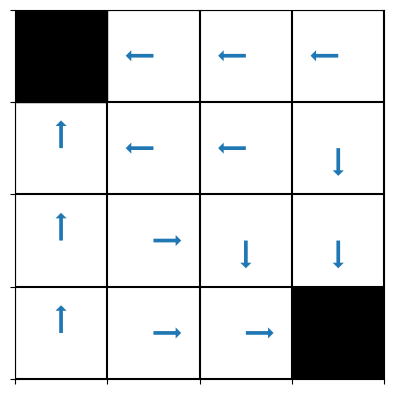

In [12]:
plot_policy(make_greedy_policy(expected_sarsa_Q))


In [13]:
from td import double_Q_learning
double_Q_learning_policy, double_Q_learning_Q = double_Q_learning(env, 1000, 0.5)
double_Q_learning_Q

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [-2.0045166 , -2.87117167, -2.5327988 , -1.        ],
       [-3.07080078, -4.35122293, -3.29589844, -2.00000004],
       [-3.85609449, -4.23439446, -3.        , -4.26287079],
       [-1.        , -2.546875  , -2.48095703, -1.89538574],
       [-2.        , -3.13055228, -3.82874298, -3.05725098],
       [-3.28747559, -3.43159676, -3.        , -3.17539401],
       [-4.00296979, -2.86920166, -2.        , -3.49682778],
       [-2.        , -4.4714241 , -2.59777832, -3.76318359],
       [-3.79520798, -3.        , -2.9440919 , -3.31689453],
       [-3.99138887, -2.        , -3.02563477, -4.03482056],
       [-2.98642785, -1.99192047, -1.        , -2.9981333 ],
       [-3.00000001, -3.67674065, -4.60198975, -4.6352328 ],
       [-4.36690521, -3.07568359, -3.18844795, -4.03150737],
       [-2.2265625 , -1.        ,  0.        , -3.26003192],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

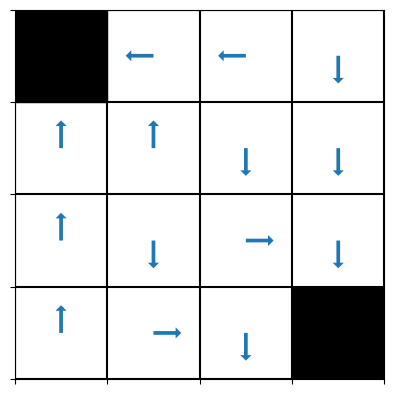

In [14]:
plot_policy(make_greedy_policy(double_Q_learning_Q))

In [19]:
from td import n_step_td_prediction
np.random.seed(2)
n_step_td_prediction(env, eq_policy, 1, 1000, 0.4, 1)


array([  0.        , -14.0757536 , -21.08010436, -26.5338097 ,
       -12.5844822 , -19.66941083, -23.67633978, -25.91602959,
       -20.21795288, -20.19258194, -21.11425471, -15.14629217,
       -20.76450783, -20.63836259, -18.1952297 ,   0.        ])

In [16]:
np.random.seed(2)
td_prediction(env, eq_policy, 1000, 0.4, 1)

array([  0.        , -14.0757536 , -21.08010436, -26.5338097 ,
       -12.5844822 , -19.66941083, -23.67633978, -25.91602959,
       -20.21795288, -20.19258194, -21.11425471, -15.14629217,
       -20.76450783, -20.63836259, -18.1952297 ,   0.        ])